# 核密度估计 - Kernel Density Estimation, KDE

核密度估计（Kernel Density Estimation, KDE）是一种用于估计连续随机变量概率密度函数的非参数方法。KDE 可以通过对数据点进行平滑处理，生成一个连续的概率密度函数，从而帮助我们理解数据的分布情况。

## 核密度估计的基本概念

1. **核函数（Kernel Function）**：
   核函数是一个非负的对称函数，其积分为1。常见的核函数包括高斯核（Gaussian kernel）、矩形核（Rectangular kernel）、三角形核（Triangular kernel）等。高斯核是最常用的核函数。

2. **带宽（Bandwidth）**：
   带宽是一个参数，控制核函数的宽度。带宽越大，估计的密度函数越平滑；带宽越小，密度函数越陡峭。选择合适的带宽对于核密度估计的效果至关重要。

3. **核密度估计的公式**：
   对于给定的样本数据 $X = \{x_1, x_2, \ldots, x_n\}$ 和核函数 $K$ 以及带宽 $h$，核密度估计的公式为：

   $$
   \hat{f}(x) = \frac{1}{n h} \sum_{i=1}^{n} K\left(\frac{x - x_i}{h}\right)
   $$

   其中，$\hat{f}(x)$ 是在点 $x$ 处的估计密度，$x_i$ 是数据点，$h$ 是带宽，$K$ 是核函数。

## 核密度估计的步骤

1. **选择核函数**：
   通常使用高斯核函数，因为它的平滑效果较好，计算简单。

2. **选择带宽**：
   带宽可以通过交叉验证等方法选择，常见的带宽选择方法包括 Silverman's rule of thumb。

3. **计算估计密度**：
   使用核密度估计公式计算每个点的密度值。

## 示例

为了展示不使用核密度估计（KDE）平滑数据点和使用KDE平滑数据点的区别，我们可以通过绘制原始数据点的直方图和KDE平滑曲线来进行对比。

以下是一个具体的对比示例，使用 Seaborn 提供的 tips 数据集中的 total_bill 数据。


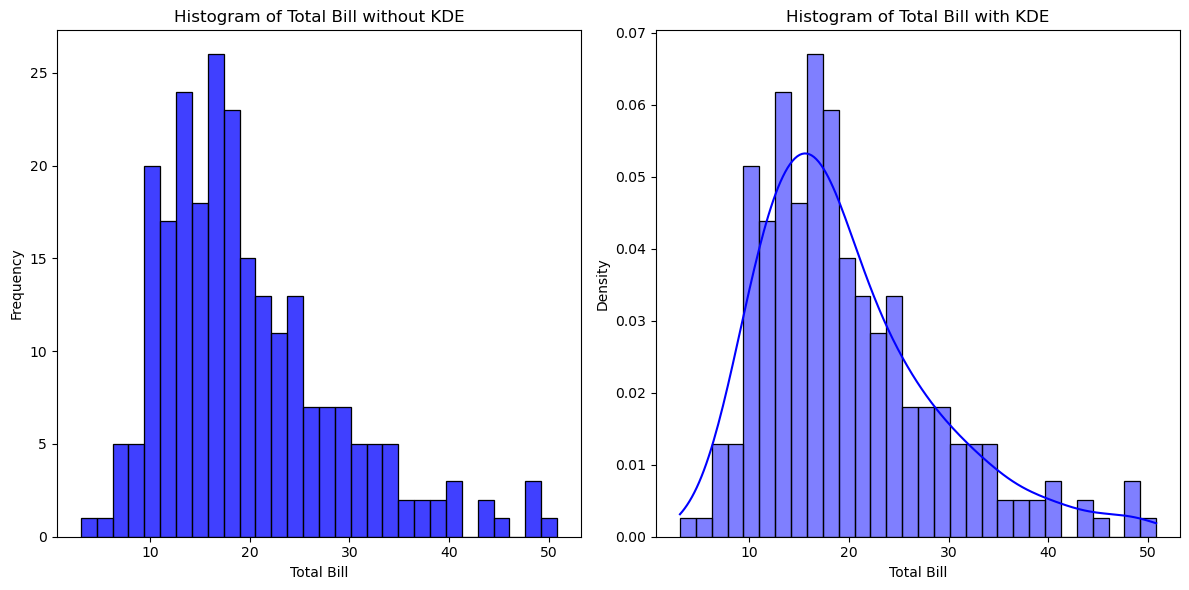

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 加载示例数据集
tips = pd.read_csv("../../data/tips.csv")

# 设置图形大小
plt.figure(figsize=(12, 6))

# 不使用 KDE 的直方图
plt.subplot(1, 2, 1)
sns.histplot(tips["total_bill"], kde=False, bins=30, color="blue")
plt.title("Histogram of Total Bill without KDE")
plt.xlabel("Total Bill")
plt.ylabel("Frequency")

# 使用 KDE 的直方图
plt.subplot(1, 2, 2)
sns.histplot(tips["total_bill"], kde=True, stat="density", bins=30, color="blue")
plt.title("Histogram of Total Bill with KDE")
plt.xlabel("Total Bill")
plt.ylabel("Density")

# 显示图形
plt.tight_layout()
plt.show()

### 解释

1. **左图（不使用 KDE）**：
   - 仅显示 `total_bill` 的直方图，展示了每个区间的频率。
   - 由于没有平滑处理，数据分布可能显得较为粗糙，包含较多噪音。
   - 不易看出数据的整体分布形态。

2. **右图（使用 KDE）**：
   - 在直方图上叠加了一条 KDE 曲线，展示了 `total_bill` 的概率密度分布。
   - KDE 曲线通过对数据点进行平滑处理，使得分布形态更加连续和平滑。
   - 更清晰地展示了数据的集中趋势和多峰结构（如果存在）。

### 结果对比

- **不使用 KDE 的直方图**：
  - 数据点较为离散，包含较多随机波动和噪音。
  - 无法直观地看出数据的平滑分布和模式。

- **使用 KDE 的直方图**：
  - 数据点经过平滑处理，消除了部分噪音。
  - KDE 曲线提供了一个平滑的概率密度估计，使得数据的分布形态更加清晰和直观。

通过这个对比示例，可以明显看出使用 KDE 进行平滑处理后，数据的分布特征变得更加清晰，更容易理解和分析。

## 高斯核函数 - Gaussian Kernel Function

高斯核函数（Gaussian Kernel Function），也称为正态核函数，是核密度估计（KDE）中最常用的核函数之一。其公式为：

$$ K(x) = \frac{1}{\sqrt{2\pi}} e^{-\frac{1}{2} x^2} $$

- **$K(x)$**：核函数的值，在点 $x$ 处的密度。
- **$\frac{1}{\sqrt{2\pi}}$**：这是高斯核函数的标准化系数，确保核函数的积分为1。
- **$e$**：自然对数的底（约等于2.71828）。
- **$x$**：数据点与核中心的差值。

高斯核函数的图形是一个钟形曲线，与正态分布的概率密度函数形状相同。

### 核密度估计的公式

在核密度估计中，我们使用核函数对每个数据点进行平滑处理，然后对所有数据点进行加权求和。对于给定的样本数据 $X = \{x_1, x_2, \ldots, x_n\}$，带宽为 $h$ 的核密度估计的公式为：

$$ \hat{f}(x) = \frac{1}{n h} \sum_{i=1}^{n} K\left(\frac{x - x_i}{h}\right) $$


其中：

- **$\hat{f}(x)$**：在点 $x$ 处的估计密度。
- **$n$**：样本数据点的数量。
- **$h$**：带宽参数，控制平滑程度。
- **$x_i$**：样本数据点。
- **$K(\cdot)$**：核函数（这里使用高斯核函数）。

将高斯核函数代入核密度估计公式，我们得到：

$$ \hat{f}(x) = \frac{1}{n h \sqrt{2\pi}} \sum_{i=1}^{n} e^{-\frac{1}{2} \left(\frac{x - x_i}{h}\right)^2} $$